## Projeto tem como objetivo criar um conjunto de possiveis modelos em ML  para o dataset do titanic.

<br> <b>O dataset é um conjunto de dados referente aos passageiros do Titanic.
<br> O objetivo é descobrir a probabilidade de um passageiro sobreviver.
<br> Nesse projeto será realizado as seguintes etapas:</b>

> **Etapas:** 
1. **Preparar o dataset:**
    * Carregar o dataset
    * Imprimir alguns dados do dataset
    * Obter informações sobre dados perdidos (null)
    * Extrair informações importantes do dataset
* **Limpando os dados:**
    * Incluindo valores fictícios nos campos null
    * Removendo coluna contendo valores null
    * Remover linhas com informação null
* **Separar o dataset**
* **Criando modelos para testes**
    * Criando árvore de decisão
    * Criando Florestas aleatórias
* **Realizando os testes e predições**


## 1) Preparar o dataset

### 1.1 Carregar o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('dataset/train.csv')

### 1.2 Imprimir alguns dados do dataset

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.3 Obter informações sobre dados perdidos (null)

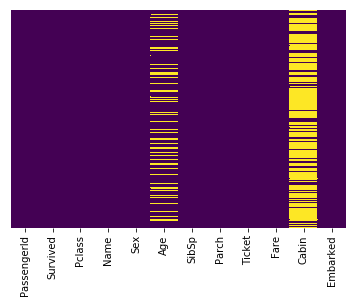

In [5]:
##Será exibido apenas os elementos que estiverem null
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. Olhando para a coluna Cabin, porém, parece que estamos perdendo muito desses dados para fazermos o mesmo. Provavelmente vamos descartar isso mais tarde ou mudá-lo para outro "Cabin Conhecido: 1 ou 0"

### 1.4 Extrair informações importantes do dataset
Para todo modelo é necessário verificar colunas importantes para conseguir extrair dados e assim criar relacionamento dos dados

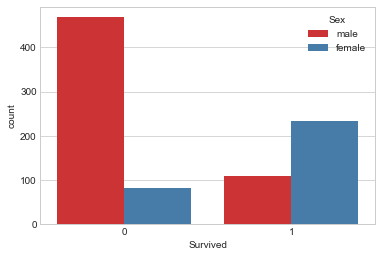

In [6]:
## Comparando os sobrevivementos e o sexo de cada um
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset,palette='Set1')

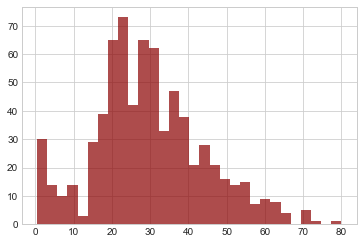

In [7]:
## Verificando a media da idade de cada pessoa
dataset['Age'].hist(bins=30,color='darkred',alpha=0.7)

## 2) Limpando os dados
Essa é uma parte bem especifica para cada Dataset, e extremamente importante.
<br>Para treinar o dataset, não pode haver nenhum valor NULL.
<br>E para solucionar esse problema será feito de 3 formas: 
 * Incluindo dados ficticios mas um pouco preciso.
 * Removendo uma coluna inteira.
 * Removendo linhas que tenha valore null
 
<br>E também não pode haver valores textuais, então eles deverão ser alterados por valores numericos, por exemplo: <i>Sexo: 0,1 ao invés de M,F  </i>

Por exemplo, para aproveitarmos a idade, podemos criar uma media da idade de acordo com a classe de cada passageiro, e incluir esse valor nos que estão null

### 2.1 Incluindo valores fictícios nos campos null

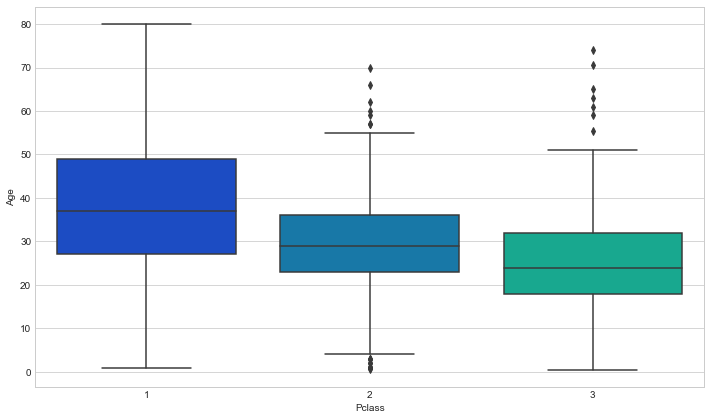

In [8]:
# Descobrir a media da idade por classe (Pclass)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [9]:
#Agora é so criar uma função para incluir a idade de acordo com a classe.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

### 2.2 Removendo coluna contendo valores null

In [10]:
## Remover a coluna Cabin devido a falta de informação que essa coluna nos fornece.
dataset.drop('Cabin',axis=1,inplace=True)

### 2.3 Remover linhas com informação null

In [11]:
##Remover qualquer linha que contenha informações null
dataset.dropna(inplace=True)

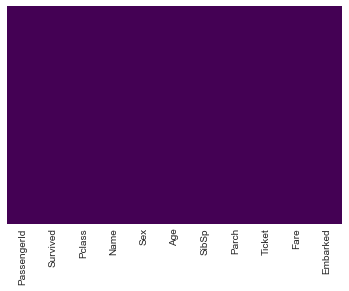

In [12]:
##Verificando se a idade foi preenchida:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
### 2.4 Substituindo as colunas que possuem apenas dois tipos para 0 e 1

In [14]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset = pd.concat([dataset,sex,embark],axis=1)

dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## 3) Separar o dataset
Para separar o dataset é preciso criar uma dataset 'X' que contém apenas valor que queira ser descoberto, no caso **Survived** e outro dataset 'y' contendo todo o resto de informação, menos a coluna  **Survived**


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = dataset.drop('Survived',axis=1)
y = dataset['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 4) Criando modelos para testes
Para criar o modelo é preciso realizar os seguintes passos:
* Instanciar o tipo de modelo
* Realizar o fit passando o x_train e o y_train
* Realizar o predict para o x_test

### 4.1 Criando árvore de decisão

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
decision_tree = DecisionTreeClassifier()

In [19]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
decision_tree_predictions = decision_tree.predict(X_test)

### 4.2 Criando Florestas aleatórias

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=600)

In [23]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
random_forest_predictions = random_forest.predict(X_test)

## 5) Realizando os testes e predições

O ideal é que o a média do precision esteja acima de 80%

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print("DECISION TREE - > \n", classification_report(y_test,decision_tree_predictions))

DECISION TREE - > 
              precision    recall  f1-score   support

          0       0.80      0.79      0.79       163
          1       0.67      0.69      0.68       104

avg / total       0.75      0.75      0.75       267



In [34]:
print("DECISION TREE - > \n", confusion_matrix(y_test,decision_tree_predictions))

DECISION TREE - > 
 [[128  35]
 [ 32  72]]


In [32]:
print("RANDOM FOREST - > \n", classification_report(y_test,random_forest_predictions))

RANDOM FOREST - > 
              precision    recall  f1-score   support

          0       0.84      0.91      0.87       163
          1       0.84      0.73      0.78       104

avg / total       0.84      0.84      0.84       267



In [31]:
print("RANDOM FOREST - > \n", confusion_matrix(y_test,random_forest_predictions))

RANDOM FOREST - > 
 [[148  15]
 [ 28  76]]
